

# Project: Investigate No-show appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

>‘ScheduledDay’ tells us on what day the patient set up their appointment.

>‘Neighborhood’ indicates the location of the hospital.

>‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.




> Questions: 
>Does gender affect attendance or not?

>Does age affect attendance or not?

>Does SMS_received affect attendance or not?





In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:

df=pd.read_csv('Noshow.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No




### Data Cleaning (Replace this with more specific notes!)

In [3]:
df.shape

(110527, 14)

In [4]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


No missing or duplicate data

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


I dont need PatientId , AppointmentID , ScheduledDay , AppointmentDay to answer my questions and analysis , so i delete them

In [6]:
df.drop (['PatientId' , 'AppointmentID' , 'ScheduledDay' , 'AppointmentDay'] , axis = 1 , inplace = True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


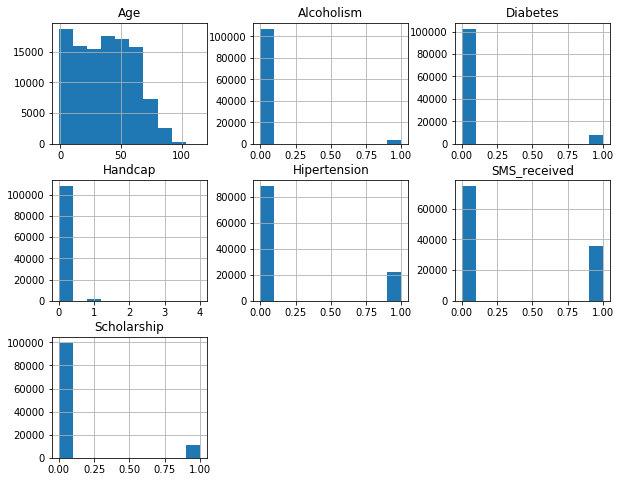

In [7]:
df.hist(figsize=(10,8));

Most the patients did not handicapped.

Few patient suffer from diabetes , Alcoholism.

In [8]:
df.drop (['Alcoholism' , 'Diabetes' , 'Handcap' ] , axis = 1 , inplace = True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,No
1,M,56,JARDIM DA PENHA,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,0,No


I dont need Alcoholism , Diabetes , Handcap to answer my questions and analysis , so i delete them

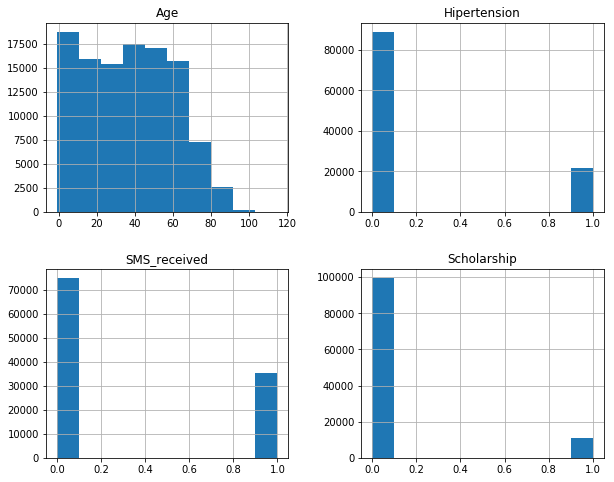

In [9]:
df.hist(figsize=(10,8));

The age column has less than zero, which doesn't make sense in my analysis so I'll delete it.

In [10]:
df.drop((df[df['Age'] < 0 ]).index , inplace=True)


Make sure to delete

In [11]:
df[df['Age'] < 0 ]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,SMS_received,No-show


Reset index after deleting a row

In [12]:
df.reset_index(drop = True , inplace = True )

No-show column name is not clear so i will change the name

In [13]:
df.rename(columns = {'No-show': 'Attended'} , inplace = True)

In [14]:
df['Attended'] = df['Attended'].replace(['No'] , 1)
df['Attended'] = df['Attended'].replace(['Yes'], 0)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,SMS_received,Attended
0,F,62,JARDIM DA PENHA,0,1,0,1
1,M,56,JARDIM DA PENHA,0,0,0,1
2,F,62,MATA DA PRAIA,0,0,0,1
3,F,8,PONTAL DE CAMBURI,0,0,0,1
4,F,56,JARDIM DA PENHA,0,1,0,1


In [15]:
Attended = df.Attended == 1
NoAttended = df.Attended == 0

In [16]:
df.fillna(df.mean() , inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110526 entries, 0 to 110525
Data columns (total 7 columns):
Gender           110526 non-null object
Age              110526 non-null int64
Neighbourhood    110526 non-null object
Scholarship      110526 non-null int64
Hipertension     110526 non-null int64
SMS_received     110526 non-null int64
Attended         110526 non-null int64
dtypes: int64(5), object(2)
memory usage: 5.9+ MB


<a id='eda'></a>
## Exploratory Data Analysis




In [18]:

def mypolt (df , xVar ):
    
    
    df[xVar][Attended].hist(alpha = 0.5 , bins = 20 , label = 'Attended')
    df[xVar][NoAttended].hist(alpha = 0.5 ,bins = 20 , label = 'NoAttended')
    plt.legend();
    plt.title(f'Comparison between of {xVar} and attendance')
    plt.xlabel(xVar)
    plt.ylabel('Attended')


    


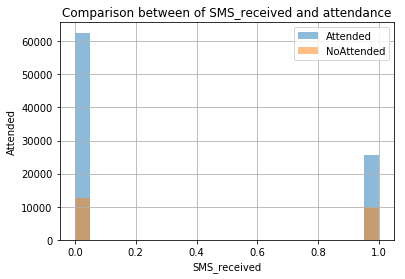

In [19]:
mypolt(df , 'SMS_received')

In [20]:
df.groupby('SMS_received').Attended.value_counts()

SMS_received  Attended
0             1           62509
              0           12535
1             1           25698
              0            9784
Name: Attended, dtype: int64

The number of people who did not receive a message more than others, so patients who did not receive a message were more present than those who received it

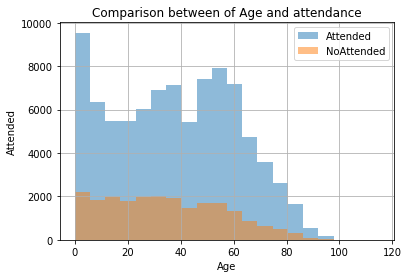

In [21]:
mypolt (df , 'Age' )



Patients in the age group 0-10 are more attend appointments than others, and also from the age of 55-60.

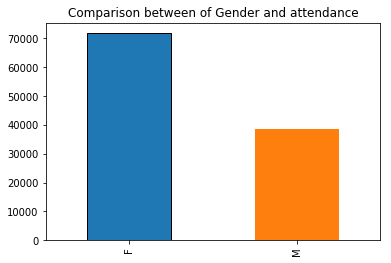

In [22]:
df['Gender'].value_counts(normalize=False).plot.bar(edgecolor= 'black' ,title= ('Comparison between of Gender and attendance')
  );


In [23]:
print(df.Gender[Attended].value_counts())
print(df.Gender[NoAttended].value_counts())

F    57245
M    30962
Name: Gender, dtype: int64
F    14594
M     7725
Name: Gender, dtype: int64


There is no clear affect between gender and attendance , but women are more booked for appointments

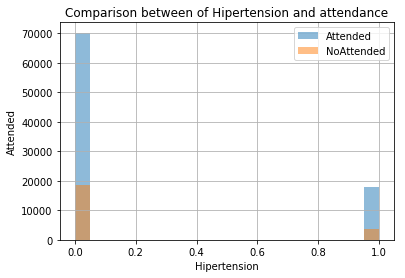

In [25]:
mypolt (df , 'Hipertension' )

There is no clear relationship between high blood pressure and attendance

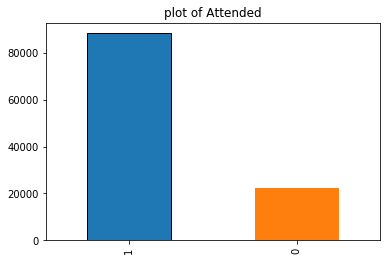

In [28]:
df['Attended'].value_counts(normalize=False).plot.bar(edgecolor= 'black' ,title= ('plot of Attended')
  );


Those who attended are twice as many as those who did not attend

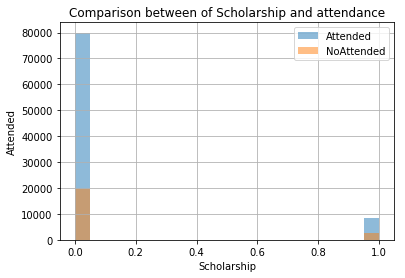

In [30]:
mypolt (df , 'Scholarship' )

There is no clear relationship between Scholarship and attendance

<a id='conclusions'></a>
## Conclusions

> No clear affect between gender and attendance , but women are more booked for appointments

>Patients in the age group 0-10 are more attend appointments than others, and also from the age of 55-60.

>Also, The number of people who did not receive a message more than others, so patients who did not receive a message were more present than those who received it

>Limition: 

> The age column has less than zero, which doesn't make sense in my analysis so I deleted it.

> The No-Show column was not clearly named so the name had to be changed.



In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0